In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

#get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#get a lisf of the rows in dict

rows = session.query(Measurement).first()
rows.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2aa6375b9b0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Last Date
lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdate

('2017-08-23')

In [13]:
# Calculate the date 1 year ago from the last data point in the database
yearago = dt.date(2017, 8, 23) - dt.timedelta(days=366)
yearago

datetime.date(2016, 8, 22)

In [14]:
# Perform a query to retrieve the data and precipitation scores
precdata = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= yearago).all()

precdata

[('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05'

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(precdata,columns=['date','precipitation'])

df

,date,precipitation
0,2016-08-22,0.40
1,2016-08-23,0.00
2,2016-08-24,0.08
3,2016-08-25,0.08
4,2016-08-26,0.00
5,2016-08-27,0.00
6,2016-08-28,0.01
7,2016-08-29,0.00
8,2016-08-30,0.00
9,2016-08-31,0.13


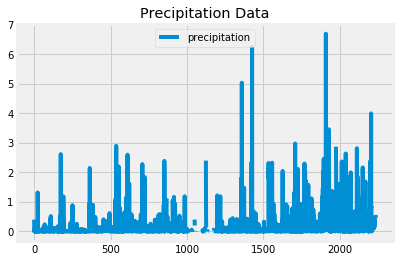

In [16]:
df.plot(title="Precipitation Data")
plt.legend(loc='upper center')
plt.show()

In [18]:


# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2026.000000
mean,0.179437
std,0.463989
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [21]:
# Design a query to show how many stations are available in this dataset?
avail_stations = session.query(Measurement.station).distinct().count()
avail_stations

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.tobs).desc())

active_stations.all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
#most active station
most_active_station = active_stations[0][0]
most_active_station

'USC00519281'

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temp_info = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
            filter(Measurement.station == most_active_station).all()
temp_info




[(54.0, 85.0, 71.66378066378067)]

In [203]:
# Choose the station with the highest number of temperature observations.
station_name = session.query(Station.name).filter(Station.station == active_stations[0][0]).all()
station_name

[('WAIHEE 837.5, HI US')]

In [204]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waihee_temp_observ = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= yearago).\
                    filter(Station.station == active_stations[0][0]).all()
waihee_temp_df = pd.DataFrame(waihee_temp_observ)

waihee_temp_df.head()

,date,tobs
0,2016-08-22,77.0
1,2016-08-23,81.0
2,2016-08-24,79.0
3,2016-08-25,80.0
4,2016-08-26,79.0


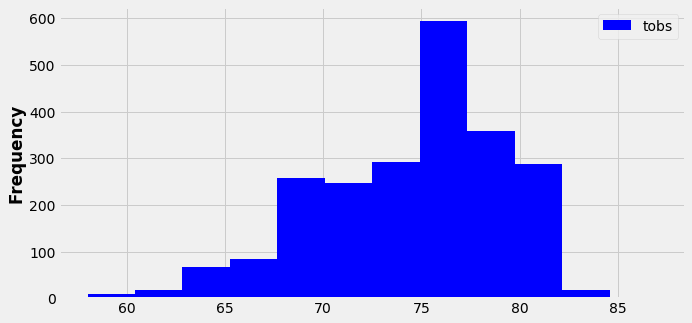

In [205]:
# plot the results as a histogram

plt.figure(figsize=(10,5))
plt.hist(waihee_temp_df['tobs'],bins=12, color='blue')
plt.ylabel('Frequency', weight='bold')
plt.legend(["tobs"],loc="best")

plt.show()

In [206]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [207]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))
print(calc_temps('2017-07-01', '2017-07-10'))


[(69.0, 78.15254237288136, 87.0)]


In [208]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.



tripdata = calc_temps('2017-07-01', '2017-07-10')
tripdata

tripdata_df = pd.DataFrame(tripdata, columns=["tmin", "tavg", "tmax"])
tripdata_df



,tmin,tavg,tmax
0,69.0,78.152542,87.0


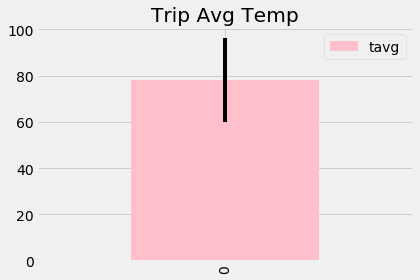

In [209]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tripdata_df.plot.bar(y='tavg', yerr=(tripdata_df['tmax'] - tripdata_df['tmin']), title='Trip Avg Temp', color='pink')

In [210]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def precipitation(start_date, end_date):

    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         precipitation amount, station, name, latitude, longitude, and elevation
        
        sel = [Measurement.station,
              Station.name,
              Station.latitude,
              Station.longitude,
              Station.elevation,
              Measurement.prcp]
        
        return session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).\
                        filter(Measurement.station).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

# # function usage example
print(precipitation('2017-07-01', '2017-07-10'))

[]


In [211]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [212]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [219]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [214]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [218]:
# Plot the daily normals as an area plot with `stacked=False`


In [220]:
## Step 2

In [232]:
# Design a Flask API based on the queries that you have just developed
from flask import Flask, jsonify

#create a connection
engine = create_engine("sqlite:///Resources/hawaii.sqlite",connect_args={'check_same_thread': False}, echo=True)

#declare a base using 'automap_base()'
Base = automap_base()

#use base class to reflect the database tables
Base.prepare(engine, reflect=True)


#assign to a variable
Station = Base.classes.station

#create a session
session = Session(engine)

#flask setup
app = Flask(__name__)



2019-03-30 23:18:38,519 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-03-30 23:18:38,521 INFO sqlalchemy.engine.base.Engine ()
2019-03-30 23:18:38,523 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-03-30 23:18:38,523 INFO sqlalchemy.engine.base.Engine ()
2019-03-30 23:18:38,525 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-03-30 23:18:38,526 INFO sqlalchemy.engine.base.Engine ()
2019-03-30 23:18:38,529 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("measurement")
2019-03-30 23:18:38,530 INFO sqlalchemy.engine.base.Engine ()
2019-03-30 23:18:38,532 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'measurement' AND type = 'table'
2019-03-30 23:18:38,532 INFO sqlalchemy.engine.base.Engine ()
2019-03-30 23:18:38,534 INFO sqlalchemy.

In [239]:
#flash routes

@app.route("/")

def welcome():
    return(
        f'Available Routes<br/>'
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/start<br/>"
        f"/api/v1.0/start/end"
    )
        
        

AssertionError: View function mapping is overwriting an existing endpoint function: welcome